# Google Causal Impact Modelling

In [38]:
# new libraries required
%pip install yfinance
%pip install tfcausalimpact


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [39]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Relevant Dates for study
training_start_date = "2020-09-01" # This is a factor to be evaluated based on factors thought important.
training_end_date= "2020-10-19"
treatment_start_date = "2020-10-20"  #20 october 2020
treatment_end_date="2020-10-23"
end_stock_date="2020-10-24"

In [41]:
# Fetching Bitcoin data from the internet
# Bitcoin ticker : BTC-USD
ticker_list=["BTC-USD"]
y = yf.download(tickers=ticker_list,start=training_start_date,end=end_stock_date,interval="1d")

[*********************100%***********************]  1 of 1 completed


In [42]:
# Data that matters to us
y = y['Adj Close'].rename("y")
y

Date
2020-09-01    11970.478516
2020-09-02    11414.034180
2020-09-03    10245.296875
2020-09-04    10511.813477
2020-09-05    10169.567383
2020-09-06    10280.351562
2020-09-07    10369.563477
2020-09-08    10131.516602
2020-09-09    10242.347656
2020-09-10    10363.138672
2020-09-11    10400.915039
2020-09-12    10442.170898
2020-09-13    10323.755859
2020-09-14    10680.837891
2020-09-15    10796.951172
2020-09-16    10974.905273
2020-09-17    10948.990234
2020-09-18    10944.585938
2020-09-19    11094.346680
2020-09-20    10938.271484
2020-09-21    10462.259766
2020-09-22    10538.459961
2020-09-23    10246.186523
2020-09-24    10760.066406
2020-09-25    10692.716797
2020-09-26    10750.723633
2020-09-27    10775.269531
2020-09-28    10709.652344
2020-09-29    10844.640625
2020-09-30    10784.491211
2020-10-01    10619.452148
2020-10-02    10575.974609
2020-10-03    10549.329102
2020-10-04    10669.583008
2020-10-05    10793.339844
2020-10-06    10604.406250
2020-10-07    10668.968

In [43]:
# stocks as control groups

control_stocks = ["ZAL.DE","SQ","CRSP","TRMB","JD","DE","KTOS","GOOG"]
X= yf.download(tickers=control_stocks,start=training_start_date,end=end_stock_date,interval="1d")

[*********************100%***********************]  8 of 8 completed


In [44]:
X.head()

Adj Close                                               \
                 CRSP          DE       GOOG         JD       KTOS   
Date                                                                 
2020-09-01  93.419998  210.679596  83.035500  79.267685  19.700001   
2020-09-02  93.930000  210.118271  86.414001  79.959557  19.910000   
2020-09-03  85.690002  204.021164  82.092003  75.952454  19.520000   
2020-09-04  82.019997  204.534073  79.552002  76.874954  19.260000   
2020-09-07        NaN         NaN        NaN        NaN        NaN   

                                                  Close              ...  \
                    SQ       TRMB     ZAL.DE       CRSP          DE  ...   
Date                                                                 ...   
2020-09-01  166.660004  53.410000  77.000000  93.419998  217.690002  ...   
2020-09-02  162.880005  54.310001  77.000000  93.930000  217.110001  ...   
2020-09-03  152.860001  50.900002  75.080002  85.690002  210.809998  ...   
2020-09-04  146.389999  49.959999  71.739998  82.019997  211.339996  ...   
2020-09-07         NaN        NaN  74.000000        NaN         NaN  ...   

                 Open                Volume                         \
                 TRMB     ZAL.DE       CRSP         DE        GOOG   
Date                                                                 
2020-09-01  52.669998  74.959999   779500.0  1873400.0  36506000.0   
2020-09-02  53.779999  77.500000   532000.0  1983000.0  50224000.0   
2020-09-03  54.130001  77.260002  1278900.0  1975200.0  62156000.0   
2020-09-04  51.040001  74.800003  1570300.0  1662300.0  52172000.0   
2020-09-07        NaN  72.239998        NaN        NaN         NaN   

                                                                  
                    JD       KTOS          SQ       TRMB  ZAL.DE  
Date                                                              
2020-09-01  11431400.0   587600.0  12306400.0   542300.0  790198  
2020-09-02  13860900.0   612800.0  11214800.0   728800.0  496554  
2020-09-03  19254000.0   847100.0  16421200.0  1220300.0  736259  
2020-09-04  21500900.0  1060000.0  17995200.0   914700.0  662250  
2020-09-07         NaN        NaN         NaN        NaN  362062  

[5 rows x 48 columns]

In [45]:
# Getting Only the adjusted close data for all 8 stocks

X = X.iloc[:,:len(control_stocks)]
X.head()

Adj Close                                               \
                 CRSP          DE       GOOG         JD       KTOS   
Date                                                                 
2020-09-01  93.419998  210.679596  83.035500  79.267685  19.700001   
2020-09-02  93.930000  210.118271  86.414001  79.959557  19.910000   
2020-09-03  85.690002  204.021164  82.092003  75.952454  19.520000   
2020-09-04  82.019997  204.534073  79.552002  76.874954  19.260000   
2020-09-07        NaN         NaN        NaN        NaN        NaN   

                                              
                    SQ       TRMB     ZAL.DE  
Date                                          
2020-09-01  166.660004  53.410000  77.000000  
2020-09-02  162.880005  54.310001  77.000000  
2020-09-03  152.860001  50.900002  75.080002  
2020-09-04  146.389999  49.959999  71.739998  
2020-09-07         NaN        NaN  74.000000

In [46]:
# Removing the level called Adj Close that was common to all stocks
X.columns = X.columns.droplevel()
X.head()

,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,
2020-09-01,93.419998,210.679596,83.035500,79.267685,19.700001,166.660004,53.410000,77.000000
2020-09-02,93.930000,210.118271,86.414001,79.959557,19.910000,162.880005,54.310001,77.000000
2020-09-03,85.690002,204.021164,82.092003,75.952454,19.520000,152.860001,50.900002,75.080002
2020-09-04,82.019997,204.534073,79.552002,76.874954,19.260000,146.389999,49.959999,71.739998
2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.000000


In [59]:
# Timezone:: Just for observation sake
X.index 



DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-12', '2020-10-13', '2020-10-14',
               '2020-10-15', '2020-10-16', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [60]:
# combine data while dropping ones where NaNs are present
df = pd.concat([y,X],axis=1).dropna()

df.tail()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-19,11742.037109,107.720001,231.292221,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000
2020-10-20,11916.334961,106.699997,231.971970,77.796501,79.344559,20.660000,185.740005,51.919998,84.980003
2020-10-21,12823.689453,92.220001,229.573334,79.665497,79.402214,20.580000,177.820007,50.740002,83.139999
2020-10-22,12965.891602,90.160004,230.039490,80.766502,78.133781,21.469999,175.929993,50.939999,83.839996
2020-10-23,12931.539062,92.650002,232.612946,82.050003,78.162598,21.600000,176.770004,50.080002,82.559998


In [61]:
# Training dataset will occur when date is equal to the last training date
df_training = df[(df.index<=training_end_date)]
df_training.tail()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-10-13,11425.899414,103.059998,230.369659,78.584000,79.383003,20.959999,190.470001,51.720001,85.820000
2020-10-14,11429.506836,101.370003,231.583557,78.403999,77.931984,21.010000,187.490005,50.540001,84.980003
2020-10-15,11495.349609,99.889999,231.360214,77.956497,77.115189,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,109.830002,233.127640,78.650497,78.335571,20.790001,186.350006,52.340000,84.800003
2020-10-19,11742.037109,107.720001,231.292221,76.730499,77.461121,20.639999,186.960007,51.970001,85.000000


# Stationarity Test




In [62]:
from statsmodels.tsa.stattools import adfuller


# check if bitcoin data is stationary


p_val = adfuller(x=df_training.y)[1]
print(f"data is stationary") if p_val < 0.05 else print("Data not stationary")


Data not stationary


In [63]:
# To make data stationary we will use differencing[we basically subtract or divide pairs of adjacent data]

differencing = df_training.pct_change().dropna()


print(f"data is stationary") if adfuller(x= differencing.y)[1] < 0.05 else print("Data not stationary")

data is stationary


<Axes: >

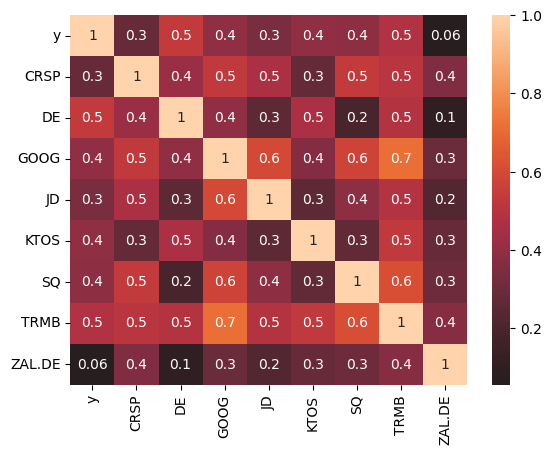

In [64]:
# Visualizing Correlation matrix

sns.heatmap(data=differencing.corr(),annot=True, center=0,fmt='.1g')

In [65]:
# Remove ZAL.DE since its not correlated with y
df_final = df.drop(columns=["ZAL.DE"])
df_final.head()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,210.679596,83.035500,79.267685,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,210.118271,86.414001,79.959557,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,204.021164,82.092003,75.952454,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,204.534073,79.552002,76.874954,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,203.469498,76.619499,73.242615,19.230000,139.110001,49.139999


In [66]:
# Pre and Post period
pre_period = [training_start_date,training_end_date]
post_period = [treatment_start_date,treatment_end_date]

In [72]:
# Google Causal Impact Analysis


In [67]:
from causalimpact import CausalImpact


In [69]:
# impact = CausalImpact(data= df_final, pre_period=pre_period,post_period=post_period)

# #plot the impact
# # impact.plot()

# The error is not happening in Google Colabortaory but in local host

ValueError: Pandas DataFrame or Series has a DatetimeIndex with no set frequency, but STS requires regularly spaced observations. Consider using `tfp.sts.regularize_series` to infer a frequency and build a regularly spaced series (by marking unobserved steps as missing observations).